Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


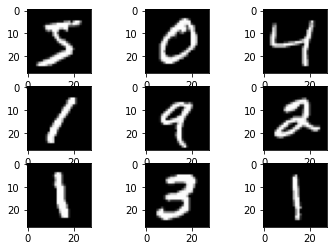

In [81]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
X_val=trainy
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()


In [ ]:


#Validation split
rand=np.arange(60000)
np.random.shuffle(rand)
train_no=rand[:50000]

val_no=np.setdiff1d(rand,train_no)

X_train,X_val=X[train_no,:,:],X[val_no,:,:]
Y_train,Y_val=Y[train_no],Y[val_no]

In [82]:
import numpy as np
import requests, gzip, os, hashlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Universal\AppData\Roaming\Python\Python36\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [83]:
def init(x,y):
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1=init(28*28,128)
l2=init(128,10)


In [84]:
#Sigmoid function
def sigmoid(x):
    return 1/(np.exp(-x)+1)    

#derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

In [85]:
def softmax(x):
    exponents=np.exp(x)
    return exponents/np.sum(exponents)

In [86]:
out=np.array([1,2,3])
softmax(out),sum(softmax(out))

(array([0.09003057, 0.24472847, 0.66524096]), 1.0)

In [87]:
output_of_layer_2=np.array([12,34,-67,23,0,134,76,24,78,-98])
a=softmax(output_of_layer_2)
a,sum(a)

(array([1.03770332e-053, 3.72007598e-044, 5.09107081e-088, 6.21315959e-049,
        6.37586958e-059, 1.00000000e+000, 6.47023493e-026, 1.68891188e-048,
        4.78089288e-025, 1.75258947e-101]), 1.0)

In [88]:
x=np.argmax(a)
x,output_of_layer_2[x]

(5, 134)

In [89]:
#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [90]:
#forward and backward pass
def forward_backward_pass(x,y):
    print("Shape x ==> ",x.shape)
    print("Shape y --> ",y.shape)
    targets = np.zeros((len(y),10), np.float32)
    targets[range(targets.shape[0]),y] = 1
 
    
    x_l1=x.dot(l1)
    x_sigmoid=sigmoid(x_l1)
    x_l2=x_sigmoid.dot(l2)
    out=softmax(x_l2)
   
 
    error=2*(out-targets)/out.shape[0]*d_softmax(x_l2)
    update_l2=x_sigmoid.T@error
    
    
    error=((l2).dot(error.T)).T*d_sigmoid(x_l1)
    update_l1=x.T@error

    return out,update_l1,update_l2 


In [91]:
trainy

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [92]:
ex=np.array(trainy[1]).reshape(1,1)
ex

array([[0]], dtype=uint8)

In [93]:
example_out = np.zeros((len(ex),10), np.float32)
example_out[range(example_out.shape[0]),ex] = 1
example_out

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [94]:
x_l1=np.dot(x,l1)
x_sigmoid=sigmoid(x_l1)
x_l2=x_sigmoid.dot(l2)
out=softmax(x_l2)

In [76]:
epochs=10000
lr=0.001
batch=128

losses,accuracies,val_accuracies=[],[],[]


for i in range(epochs):
    sample=np.random.randint(0,trainX.shape[0],size=(batch))
    print(sample)
    x=trainX[sample].reshape((28*28,128))
    y=trainy[:,sample]
 

    out,update_l1,update_l2=forward_backward_pass(x,y)
  
    category=np.argmax(out,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)
    
    loss=((category-y)**2).mean()
    losses.append(loss.item())
    
    l1=l1-lr*update_l1
    l2=l2-lr*update_l2
    
    if(i%20==0):    
        y=y.reshape((-1,128))
        val_out=np.argmax(softmax(sigmoid(x.dot(l1)).dot(l2)),axis=1)
        val_acc=(val_out==y).mean()
        val_accuracies.append(val_acc.item())
    if(i%500==0): print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')


[43963 34683 54185 39894 16316 53882  8447   923 58625 11616 42959 38144
  9330 28091   587 26795  3185 46427 52963 59407 42262 23791 17273 46513
  5889  5738 34872  1532 37331  1330 35819  7589  1860 48718 20984 10825
 46956 30880  8704 56629 39495 52972  8235 12831 44607  9140 32650 50035
 45887 42128 21837 39114 56383 40035 53845 12134 59473  8902  7991 43649
 58279 42555 35836 16142 23232 18131 42087 17133 41631 49796 10776 58523
 18837  8972  3255 21937 44506   432  9068 54419  2856  4785 50815 27072
 48114 26419 31758 25920 19975 27355 21621 34711  9807 29588  3844 52450
 44952 55354 22520 56076 41211 34823 54868  8668 26058 52017  2278 25517
 16148 17610 22303 15532 16618 57416 54280 10341 19369 12020 41425  7573
 27199  7126 30267 30451  3687 21399 22930 47345]


ValueError: shapes (784,128) and (784,128) not aligned: 128 (dim 1) != 784 (dim 0)

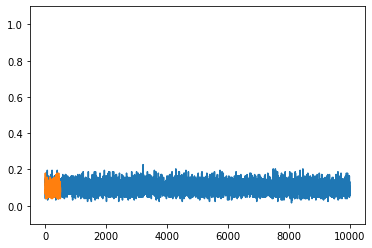

In [65]:
plt.ylim(-0.1, 1.1)
plot(accuracies)
plot(val_accuracies)
plt.show()

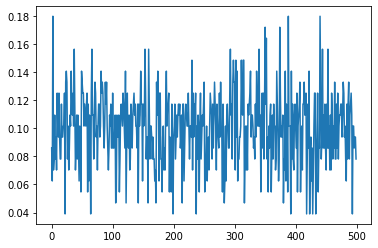

In [66]:
plot(val_accuracies)
plt.show()

In [69]:
m = [[0,0,0,0,0,0,0],
     [0,0,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]
sample=np.random.randint(0,trainX.shape[0],size=(batch))
testX=testX[sample].reshape((-1,128))
test_out=np.argmax(softmax(sigmoid(testX.dot(l1)).dot(l2)),axis=1)
test_acc=(test_out==testy).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')

IndexError: index 51019 is out of bounds for axis 0 with size 10000

NameError: name 'm' is not defined